## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading in the dataset

In [2]:
df=pd.read_csv('/content/19BCT0097- Texas-Wind-Turbine-Energy-Prediction.csv')
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [3]:
df.columns

Index(['Time stamp', 'System power generated | (kW)', 'Wind speed | (m/s)',
       'Wind direction | (deg)', 'Pressure | (atm)', 'Air temperature | ('C)'],
      dtype='object')

In [4]:
df['Pressure | (atm)'].max()

1.01451

##So, our job here would be to predict the System power generated given the rest of these parameters.

In [5]:
df.isna().sum()

Time stamp                       0
System power generated | (kW)    0
Wind speed | (m/s)               0
Wind direction | (deg)           0
Pressure | (atm)                 0
Air temperature | ('C)           0
dtype: int64

## Performing Simple Linear Regression without pipeline creation.

In [6]:
from sklearn.preprocessing import StandardScaler
# create an object of the StandardScaler
scaler = StandardScaler()
scaler.fit(np.array(df['Wind speed | (m/s)']).reshape(-1,1))
# transform the data
df['Wind speed | (m/s)'] = scaler.transform(np.array(df['Wind speed | (m/s)']).reshape(-1,1))
scaler.fit(np.array(df['Wind direction | (deg)']).reshape(-1,1))
df['Wind direction | (deg)']=scaler.transform(np.array(df['Wind direction | (deg)']).reshape(-1,1))
scaler.fit(np.array(df["Air temperature | ('C)"]).reshape(-1,1))
df["Air temperature | ('C)"]=scaler.transform(np.array(df["Air temperature | ('C)"]).reshape(-1,1))
scaler.fit(np.array(df["System power generated | (kW)"]).reshape(-1,1))
df["System power generated | (kW)"]=scaler.transform(np.array(df["System power generated | (kW)"]).reshape(-1,1))
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",0.913107,0.812552,-0.219858,1.000480,-0.800069
1,"Jan 1, 01:00 am",0.534272,0.604465,-0.137188,0.999790,-0.779471
2,"Jan 1, 02:00 am",0.230803,0.409125,-0.054517,0.999592,-0.717679
3,"Jan 1, 03:00 am",0.637583,0.664374,0.016343,0.998309,-0.697081
4,"Jan 1, 04:00 am",0.477869,0.576104,0.039963,0.998507,-0.655886


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
train_X = df.drop(columns=['Time stamp','System power generated | (kW)'])
train_Y = df['System power generated | (kW)']

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.2,random_state=0)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((7008, 4), (1752, 4), (7008,), (1752,))

In [9]:
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(train_x, train_y)
# predict the target on train and test data 
predict_train = model_LR.predict(train_x)
predict_test  = model_LR.predict(test_x)
from sklearn.metrics import mean_squared_error, r2_score
# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))
print('Coefficient of determination: %.2f'
      % r2_score(test_y, predict_test))

RMSE on train data:  0.2955598319823536
RMSE on test data:  0.29237762689460767
Coefficient of determination: 0.92


# Using a pipeline

The different techniques of supervised learning used in this case include: Linear Regression, Decision Tree Regression, Random Forest Regression, Gradient Boosting Regression, Extra Trees Regression and XGBoost.

In [10]:
df=pd.read_csv('/content/19BCT0097- Texas-Wind-Turbine-Energy-Prediction.csv')
train_X = df.drop(columns=['Time stamp','System power generated | (kW)'])
train_Y = df[['System power generated | (kW)']]

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.2,random_state=0)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((7008, 4), (1752, 4), (7008, 1), (1752, 1))

In [11]:
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Reduce Dimension using PCA
## 3. Apply  Classifier

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import  ExtraTreesRegressor
import xgboost
from xgboost import XGBRegressor

In [13]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA()),
                     ('lr_regressor',LinearRegression())])
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA()),
                     ('dt_regressor',DecisionTreeRegressor(min_samples_leaf=.0001))])
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA()),
                     ('rf_regressor',RandomForestRegressor(n_estimators=500,min_samples_leaf=.0001))])
pipeline_gradientbr=Pipeline([('scalar4',StandardScaler()),
                     ('pca4',PCA()),
                     ('gb_regressor',GradientBoostingRegressor(n_estimators=1000))])
pipeline_etr=Pipeline([('scalar5',StandardScaler()),
                     ('pca5',PCA()),
                     ('et_regressor',ExtraTreesRegressor(n_estimators=1000))])
pipeline_xgbr=Pipeline([('scalar6',StandardScaler()),
                     ('pca6',PCA()),
                     ('xgb_regressor',XGBRegressor(n_estimators=1000))])

In [14]:
## Let's make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_gradientbr,pipeline_etr, pipeline_xgbr]

In [15]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [19]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: 'Gradient Boosting', 4:'Extra Trees', 5:'XGBoost'}
history=[]
# Fit the pipelines
for pipe in pipelines:
	history.append(pipe.fit(train_x,train_y))

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[18:57:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## Testing the models and viewing the accuracies and loss metrics

In [20]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(test_x,test_y)))

Logistic Regression Test Accuracy: 0.9154151975855751
Decision Tree Test Accuracy: 0.9870634877233848
RandomForest Test Accuracy: 0.9960064073227823
Gradient Boosting Test Accuracy: 0.9978936615883365
Extra Trees Test Accuracy: 0.9977892836545829
XGBoost Test Accuracy: 0.9980942766081916


In [21]:
for i,model in enumerate(pipelines):
    if model.score(test_x,test_y)>best_accuracy:
        best_accuracy=model.score(test_x,test_y)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:XGBoost


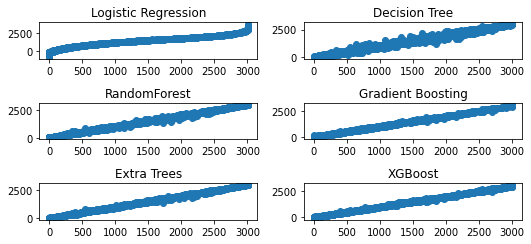

In [38]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(3, 2)
for i,model in enumerate(pipelines):
  plt.subplot(3,2,i+1)
  plt.scatter(test_y,model.predict(test_x))
  plt.title(pipe_dict[i])
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
for i,model in enumerate(pipelines):
  print(pipe_dict[i]+":")
  print("MSE: {}".format(mean_squared_error(test_y,model.predict(test_x))))
  print("RMSE: {}".format(mean_squared_error(test_y,model.predict(test_x),squared=False)))
  print("MAE: {}".format(mean_absolute_error(test_y,model.predict(test_x))))
  print("-------")

Logistic Regression:
MSE: 65975.04265980652
RMSE: 256.8560738230781
MAE: 216.3180134011222
-------
Decision Tree:
MSE: 10090.31084729766
RMSE: 100.45053930814737
MAE: 64.91672214155253
-------
RandomForest:
MSE: 3114.950200562185
RMSE: 55.81173891362089
MAE: 34.40748069113973
-------
Gradient Boosting:
MSE: 1642.9164885273926
RMSE: 40.53290624329068
MAE: 28.36915309396493
-------
Extra Trees:
MSE: 1724.3299154737426
RMSE: 41.52505166130131
MAE: 24.578011663579
-------
XGBoost:
MSE: 1486.4393896238591
RMSE: 38.554369267618156
MAE: 27.13615317550133
-------
